## PRACTICA OBLIGATORIA: **Acceso y Procesado de Ficheros**

* La práctica obligatoria de esta unidad consiste en varios ejercicios con tres tipos de ficheros (txt,excel y xml). Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

## #0 Qué fichero para qué cosa

La librería `os` proporciona una serie de funciones para trabajar con archivos y hacer operaciones del sistema operativo. Importa la librería y haz uso de la función `listdir` para poder ver los ficheros que hay en el subdirectorio `data` que acompaña a este notebook.

In [5]:
import os

# os.listdir(directorio>) da una lista de los archivos contenidos en <directorio>
# prueba a ejecutar lo siguiente
for fichero in os.listdir("./data"):
    print(fichero)

city_sales.xlsx
city_sales_clean.xlsx
city_sales_limpio.xlsx
city_sales_sucio.xlsx
mbox.txt
OptaF24.xml
spam.csv
testeo.xlsx


1. Ahora crea una variable `fichero_texto`, otra `fichero_excel` y otra `fichero_xml` y asigna a cada una la ruta para acceder a cada tipo de fichero que te hayas encontrado en la salida del apartado anterior. Como recordarás una ruta es el camino para acceder a un fichero, en este caso incluye el path y el nombre del fichero (ojo os.listdir no te da el path, te da el nombre del fichero)

In [6]:
os.getcwd()

'c:\\Users\\USUARIO\\Desktop\\Curso_The_Bridge\\Bootcamp\\DS-Online_DanielR\\03_Data_Analysis\\Sprint_05\\Unidad_02_Procesado_Datos_Internos_Ficheros\\03_Practica_Obligatoria'

In [117]:
fichero_texto = "./data/mbox.txt"
fichero_excel = "./data/city_sales_sucio.xlsx"
fichero__xml = "./data/Opta24F.xml"

## #1 Fichero excel

Vamos a empezar trabajando con el fichero excel. 

1. Importa las librerías necesarias y carga los datos en un `DataFrame` el fichero cuya ruta has asignado a `fichero_excel`. Usa los argumentos necesarios para una correcta lectura

In [8]:
import pandas as pd
pd.options.mode.copy_on_write=True

In [9]:
df=pd.read_excel(fichero_excel,sheet_name=1,skiprows=4,usecols="D:F,H")  #me quito las filas y las columnas que no me interesan
df

,Unnamed: 3,date,num,city
0,1552600,2016-11-16 15:13:00,3,Cambridge
1,345468,2018-02-22 13:08:00,3,London
2,1012061,2016-01-15 15:38:00,3,Durham
3,21651,2015-03-13 12:00:00,3,London
4,769095,2017-11-30 14:49:00,4,Oxford
...,...,...,...,...
39995,304177,2017-10-09 12:35:00,4,London
39996,1416565,2015-08-21 14:21:00,3,Cambridge
39997,1036946,2016-04-08 09:23:00,4,Durham
39998,228005,2017-01-27 13:04:00,3,London


2. Renombra la primera columna para que se llame "revenue" y la columna "num" por "sales"

In [10]:
df.columns.to_list()

['Unnamed: 3', 'date', 'num', 'city']

In [11]:
# Renombrar columnas a traves de un diccionario (solo en las columnas que nos interesan)
dict_new_columns={
    "Unnamed: 3":"revenue",
    "num":"sales"
}
dict_new_columns

{'Unnamed: 3': 'revenue', 'num': 'sales'}

In [12]:
df=df.rename(columns=dict_new_columns)
df

,revenue,date,sales,city
0,1552600,2016-11-16 15:13:00,3,Cambridge
1,345468,2018-02-22 13:08:00,3,London
2,1012061,2016-01-15 15:38:00,3,Durham
3,21651,2015-03-13 12:00:00,3,London
4,769095,2017-11-30 14:49:00,4,Oxford
...,...,...,...,...
39995,304177,2017-10-09 12:35:00,4,London
39996,1416565,2015-08-21 14:21:00,3,Cambridge
39997,1036946,2016-04-08 09:23:00,4,Durham
39998,228005,2017-01-27 13:04:00,3,London


In [13]:
#otra manera de renombrar columnas
df.columns=["revenue","date","sales","city"]
df

,revenue,date,sales,city
0,1552600,2016-11-16 15:13:00,3,Cambridge
1,345468,2018-02-22 13:08:00,3,London
2,1012061,2016-01-15 15:38:00,3,Durham
3,21651,2015-03-13 12:00:00,3,London
4,769095,2017-11-30 14:49:00,4,Oxford
...,...,...,...,...
39995,304177,2017-10-09 12:35:00,4,London
39996,1416565,2015-08-21 14:21:00,3,Cambridge
39997,1036946,2016-04-08 09:23:00,4,Durham
39998,228005,2017-01-27 13:04:00,3,London


3. Muestra los tipos de datos, valores totales, etc.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   revenue  40000 non-null  int64 
 1   date     40000 non-null  object
 2   sales    40000 non-null  int64 
 3   city     40000 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [15]:
df.describe() #solo da las numericas por defecto

,revenue,sales
count,4.000000e+04,40000.000000
mean,8.972235e+05,2.800325
std,5.179151e+05,0.874714
min,5.000000e+00,1.000000
25%,4.520900e+05,2.000000
50%,8.949420e+05,3.000000
75%,1.345200e+06,3.000000
max,1.795098e+06,4.000000


In [16]:
df.city.value_counts()

city
Oxford       10126
Cambridge     9971
Durham        9966
London        9937
Name: count, dtype: int64

<Axes: >

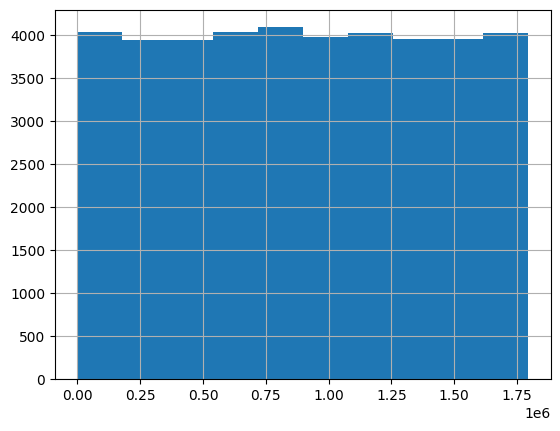

In [17]:
df.revenue.hist() #sale una distribucion muy uniforme

<Axes: >

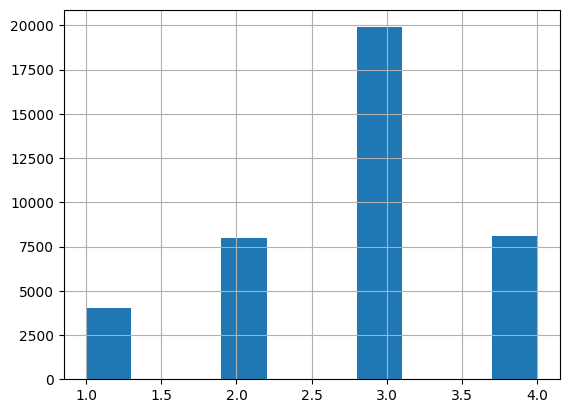

In [18]:
df.sales.hist()

4. Convierte el campo "date" a un datetime. Conviertelo en el índice del `DataFrame`

In [28]:
df_date=pd.to_datetime(df.date)  #igualo el pd.to_datetime a df.date para que se quede guardado el cambio
df_date.info()

AttributeError: 'DataFrame' object has no attribute 'date'

In [30]:
df_date=df.set_index("date")
df_date

KeyError: "None of ['date'] are in the columns"

In [21]:
df.sort_index()  #hay que ordenarlo para luego hacer slicing por fechas...

,revenue,sales,city
date,,,
2015-01-01 09:05:00,5,3,London
2015-01-01 09:28:00,448814,1,Oxford
2015-01-01 09:29:00,29,3,London
2015-01-01 09:42:00,42,4,London
2015-01-01 09:48:00,448834,4,Oxford
...,...,...,...
2019-01-31 14:58:00,448723,2,London
2019-01-31 15:09:00,1346306,3,Durham
2019-01-31 15:15:00,1795098,4,Cambridge


5. Muestra las ventas agrupadas por ciudad entre 2017 y 2018 y lo mismo con los ingresos ("revenue")

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 2016-11-16 15:13:00 to 2018-08-02 13:32:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   revenue  40000 non-null  int64 
 1   sales    40000 non-null  int64 
 2   city     40000 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


5. Sobreescribe el fichero excel guardando el dataframe sin indice, pero sin perder la columna "date" en una hoja de nombre "clean_data"

In [35]:
df_filtrado=df_date.loc["2017-01-01":"2018-12-31"]
df_filtrado

20170   2018-07-23 09:18:00
20171   2017-07-26 13:27:00
20172   2015-06-30 15:47:00
20173   2015-12-21 13:16:00
20174   2019-01-10 11:08:00
20175   2015-07-08 11:35:00
20176   2015-07-21 15:03:00
20177   2018-08-03 09:31:00
20178   2015-10-01 14:41:00
20179   2017-08-11 11:27:00
Name: date, dtype: datetime64[ns]

In [36]:
df.index

Index(['2016-11-16 15:13:00', '2018-02-22 13:08:00', '2016-01-15 15:38:00',
       '2015-03-13 12:00:00', '2017-11-30 14:49:00', '2016-03-29 13:26:00',
       '2017-12-28 10:24:00', '2017-03-16 10:10:00', '2016-10-18 15:29:00',
       '2018-12-07 11:14:00',
       ...
       '2017-08-28 11:06:00', '2015-06-29 13:25:00', '2018-10-10 15:07:00',
       '2015-02-12 12:51:00', '2018-12-18 12:44:00', '2017-10-09 12:35:00',
       '2015-08-21 14:21:00', '2016-04-08 09:23:00', '2017-01-27 13:04:00',
       '2018-08-02 13:32:00'],
      dtype='object', name='date', length=40000)

In [37]:
df_filtrado.groupby(["city"])["revenue"].sum()

KeyError: 'city'

In [38]:
fichero_excel_limpio = "./data/city_sales_limpio.xlsx"

In [42]:
df.to_excel(fichero_excel_limpio, sheet_name="clean_data")

## #2 Texto

Vamos a leer ahora el fichero indicado en la ruta contenida en `fichero_texto`, el objetivo es procesar el contenido para construir un `DataFrame` con las siguientes columnas direcciones de correo del emisor, veredicto de si es spam o no y confianza en ese veredicto.

1. Crea un diccionario con las siguientes claves: "from","to","is_spam","confidence" y que cada una tenga una lista vacia.

In [47]:
diccionario_spam={
    "from":[],
    "to":[],
    "is_spam":[],
    "confidence":[]
}


2. Lee el fichero (usando `with open...`) y muestra las primeras 60 filas por pantalla, así podrás ver como es más o menos la estructura del mismo

In [50]:
with open(fichero_texto, "r") as f:  #en realidad "r" es por defecto no haría falta ponerlo
    indice=0
    for linea in f:
        print(linea,end="") #para separar las lineas
        indice=+1
        if indice>60:
            break


From stephen.marquard@uct.ac.za Sat Jan  5 09:14:16 2008
Return-Path: <postmaster@collab.sakaiproject.org>
Received: from murder (mail.umich.edu [141.211.14.90])
	 by frankenstein.mail.umich.edu (Cyrus v2.3.8) with LMTPA;
	 Sat, 05 Jan 2008 09:14:16 -0500
X-Sieve: CMU Sieve 2.3
Received: from murder ([unix socket])
	 by mail.umich.edu (Cyrus v2.2.12) with LMTPA;
	 Sat, 05 Jan 2008 09:14:16 -0500
Received: from holes.mr.itd.umich.edu (holes.mr.itd.umich.edu [141.211.14.79])
	by flawless.mail.umich.edu () with ESMTP id m05EEFR1013674;
	Sat, 5 Jan 2008 09:14:15 -0500
Received: FROM paploo.uhi.ac.uk (app1.prod.collab.uhi.ac.uk [194.35.219.184])
	BY holes.mr.itd.umich.edu ID 477F90B0.2DB2F.12494 ; 
	 5 Jan 2008 09:14:10 -0500
Received: from paploo.uhi.ac.uk (localhost [127.0.0.1])
	by paploo.uhi.ac.uk (Postfix) with ESMTP id 5F919BC2F2;
	Sat,  5 Jan 2008 14:10:05 +0000 (GMT)
Message-ID: <200801051412.m05ECIaH010327@nakamura.uits.iupui.edu>
Mime-Version: 1.0
Content-Transfer-Encoding: 7bit
R

3. Ahora sabemos que el emisor viene después de "To:" el receptor después de "From:" el resultado de Spam tras "X-DSPAM-Result" y el nivel de confianza tras "X-DSPAM-Confidence", crea un programa que lea el fichero y a medida que va leyendo el texto añada cada valor (emisor, receptor, si es spam o no, nivel de confianza) a cada una de las listas del diccionario creado en 1.  
Por ejemplo, cuando llegue a una línea con "To:" que añada el correo a <diccionario>["to"]

In [99]:
#version larga
with open(fichero_texto, "r") as f:
    for linea in f:
        if linea.startswith("From:"):
            emisor=linea.replace("From:","").strip()
            diccionario_spam["from"].append(emisor)
        elif linea.startswith("To:"):
            destinatario=linea.replace("To:","").strip()
            diccionario_spam["to"].append(destinatario)
        elif linea.startswith("X-DSPAM-Result:"):
            resultado=linea.replace("X-DSPAM-Result:","").strip()
            diccionario_spam["is_spam"].append(resultado)  #si es distinto de innocent es spam
        elif linea.startswith("X-DSPAM-Confidence:"):
            confianza=float(linea.replace("X-DSPAM-Confidence: ","").strip())
            diccionario_spam["confidence"].append(confianza)






In [100]:
diccionario_spam
print("\n", diccionario_spam)


 {'from': ['stephen.marquard@uct.ac.za', 'louis@media.berkeley.edu', 'zqian@umich.edu', 'rjlowe@iupui.edu', 'zqian@umich.edu', 'rjlowe@iupui.edu', 'cwen@iupui.edu', 'cwen@iupui.edu', 'gsilver@umich.edu', 'gsilver@umich.edu', 'zqian@umich.edu', 'gsilver@umich.edu', 'wagnermr@iupui.edu', 'zqian@umich.edu', 'antranig@caret.cam.ac.uk', 'gopal.ramasammycook@gmail.com', 'david.horwitz@uct.ac.za', 'david.horwitz@uct.ac.za', 'david.horwitz@uct.ac.za', 'david.horwitz@uct.ac.za', 'stephen.marquard@uct.ac.za', 'louis@media.berkeley.edu', 'louis@media.berkeley.edu', 'ray@media.berkeley.edu', 'cwen@iupui.edu', 'cwen@iupui.edu', 'cwen@iupui.edu', 'stephen.marquard@uct.ac.za', 'louis@media.berkeley.edu', 'zqian@umich.edu', 'rjlowe@iupui.edu', 'zqian@umich.edu', 'rjlowe@iupui.edu', 'cwen@iupui.edu', 'cwen@iupui.edu', 'gsilver@umich.edu', 'gsilver@umich.edu', 'zqian@umich.edu', 'gsilver@umich.edu', 'wagnermr@iupui.edu', 'zqian@umich.edu', 'antranig@caret.cam.ac.uk', 'gopal.ramasammycook@gmail.com', 'd

In [101]:
print(len(diccionario_spam["from"]))
print(len(diccionario_spam["to"]))
print(len(diccionario_spam["is_spam"]))
print(len(diccionario_spam["confidence"]))

297
297
189
189


4. Recorre el diccionario y muestra el número de valores de cada lista (no los valores, ojo). Es para que compruebes que todos tienen la misma longitud

In [98]:
for clave,valor in diccionario_spam.items():
    print(f"La clave '{clave}' tiene {len(valor)} elementos.")

La clave 'from' tiene 270 elementos.
La clave 'to' tiene 270 elementos.
La clave 'is_spam' tiene 162 elementos.
La clave 'confidence' tiene 162 elementos.


Si las cuatro listas no te salen de la misma longitud, repasa el código del apartado anterior.

5. Ahora ya crea un dataframe a partir del diccionario y muestra si hay algún correo declarado como spam y la confianza media. (quizá tengas que cambiar el tipo de la columna)

In [110]:

#no tengo el mismo numero de elementos en todas las listas del diccionario
df_texto=pd.DataFrame(diccionario_spam)


ValueError: All arrays must be of the same length

6. Grába el dataframe en un fichero csv en la ruta "./data/spam.csv" con el "|" de separador y sin índice:

In [109]:
df_texto.to_csv("./data/spam.csv",sep="|", index=False)
df_texto

NameError: name 'df_texto' is not defined

In [112]:
pd.read_csv("./data/spam.csv",sep="|")

,revenue,sales,city
0,1552600,3,Cambridge
1,345468,3,London
2,1012061,3,Durham
3,21651,3,London
4,769095,4,Oxford
...,...,...,...
39995,304177,4,London
39996,1416565,3,Cambridge
39997,1036946,4,Durham
39998,228005,3,London


## #3 XML

Es hora de procesar el fichero con la ruta xml. Carga las liberias necesarias:

In [4]:

import xml.etree.ElementTree as ET

In [45]:
pip install lxml
import lxml.etree as ET

SyntaxError: invalid syntax (4243420227.py, line 1)

1. Lee el fichero tal y como has visto hacerlo en el workout, con la función `parse` de la libería adecuada (la que has importado en la celda superior)

In [ ]:
# Abrir el fichero XML y asignar el nodo raíz a la variable ejer_raiz
tree = ET.parse("./data/OptaF24.xml")  #debemos asignarlo a una variable
ejer_raiz = tree.getroot()
print('Etiqueta del nodo raíz:', ejer_raiz.tag)
print('Atributos del nodo raíz:', ejer_raiz.attrib)

Etiqueta del nodo raíz: Games
Atributos del nodo raíz: {'timestamp': '2012-09-11T10:20:32'}


In [10]:
tree.getroot()

<Element 'Games' at 0x0000017B08BE8E00>

2. Asigna el nodo raíz a la variable `ejer_raiz` y muestra su etiqueta (y sus atributos, si es que tiene)

In [11]:
ejer_raiz=tree.getroot()


In [16]:
print(ejer_raiz.tag)

if hasattr(ejer_raiz,"attrib"): #comprobamos que exista el atributo para evitarnos error al ejecutar
    print(ejer_raiz.attrib)

Games
{'timestamp': '2012-09-11T10:20:32'}


In [14]:
ejer_raiz.attrib

{'timestamp': '2012-09-11T10:20:32'}

3. Muestra cuantos hijos y nietos tiene el nodo raiz y la etiqueta de cada uno:

In [28]:
tags_hijo=[]

for indice,hijo in enumerate(ejer_raiz,1):
    tags_hijo.append(hijo.tag)
    
    tags_nieto=[]
    for nieto in hijo:
        tags_nieto.append(nieto.tag)

    print(f"Nodos para hijo {indice} con etiqueta tag:{hijo.tag}")
    print("\t", len(tags_nieto), "nietos de tipo:",list (set(tags_nieto)))


print(tags_hijo)
print("-------")
print(tags_nieto)


Nodos para hijo 1 con etiqueta tag:Game
	 1673 nietos de tipo: ['Event']
['Game']
-------
['Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 'Event', 

4. Habrás comprobado que del nodo raíz cuelgan 1673 nodos con tag "Event", encuentra uno (<nodo_raiz>.find("Event"), pero primero tendrás que encontrar un nodo raiz, pista raiz.find("Game") y de ahi...) y pinta sus atributos


In [ ]:

nodo=ejer_raiz.find("Game") #busca el primer nodo que coincida con el nombre "Game"
evento=nodo.find("Event") #hace lo mismo con el nodo hijo
evento.attrib #muestra los atributos del nodo evento ("Event")

{'id': '301038339',
 'event_id': '1',
 'type_id': '34',
 'period_id': '16',
 'min': '0',
 'sec': '0',
 'team_id': '43',
 'outcome': '1',
 'x': '0.0',
 'y': '0.0',
 'timestamp': '2011-08-21T15:23:06.696',
 'last_modified': '2011-08-21T15:54:56'}

5. Recorre de nuevo los eventos y crea un dataframe con las columnas de las claves del attrib de un "Event" y como valores los valores de los atributos de los 1673 eventos que hay colgando del nodo raíz.

In [34]:
eventos_data={}
num_eventos=0
for evento in nodo:
    col_to_fill=list(evento.attrib.keys())
    for campo,valor in evento.attrib.items():
        if campo not in eventos_data:
            eventos_data[campo]=[""]*num_eventos+[valor]
            print(campo,eventos_data[campo])
        else:
            if len(eventos_data[campo])<num_eventos:
                eventos_data[campo] +=[""]* (num_eventos-len(eventos_data[campo])) + [valor]  #relleno con vacios hasta la posicion actual
            else:
                eventos_data[campo].append(valor)
        if campo in col_to_fill:
            col_to_fill.remove(campo)
    for col in col_to_fill:
        eventos_data[col].append("")  #relleno con vacios las columnas que no se han rellenado en este evento
    num_eventos +=1
         

id ['301038339']
event_id ['1']
type_id ['34']
period_id ['16']
min ['0']
sec ['0']
team_id ['43']
outcome ['1']
x ['0.0']
y ['0.0']
timestamp ['2011-08-21T15:23:06.696']
last_modified ['2011-08-21T15:54:56']
player_id ['', '', '', '', '37572']
keypass ['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''

In [35]:
eventos_data

{'id': ['301038339',
  '1475524684',
  '2036897618',
  '336246484',
  '1372839298',
  '978322590',
  '1572252644',
  '2077205137',
  '403196518',
  '509587597',
  '1962550717',
  '1886599927',
  '604657066',
  '497476041',
  '854361320',
  '959833686',
  '1460827261',
  '834406608',
  '2031924877',
  '250341070',
  '285450208',
  '1077590418',
  '1902724460',
  '601422702',
  '388925951',
  '2091682449',
  '1539485140',
  '462919396',
  '1275093897',
  '303742790',
  '2060892907',
  '366689877',
  '2005113393',
  '1664446624',
  '2070884892',
  '1086491927',
  '939036380',
  '1469946305',
  '1461307624',
  '1589845946',
  '220466501',
  '1697913679',
  '490231060',
  '12102114',
  '1015256624',
  '295641990',
  '2144302873',
  '1967987119',
  '2022602955',
  '472177798',
  '1743092457',
  '793536122',
  '1742052007',
  '80450362',
  '314747611',
  '1298408416',
  '1595680844',
  '1299585667',
  '900496528',
  '1505032819',
  '538765048',
  '936802981',
  '182011009',
  '406961680',
  '

In [38]:
import pandas as pd

df=pd.DataFrame(eventos_data)
df

ValueError: All arrays must be of the same length

In [44]:
lista1=[Event_id.attrib for Event_id in nodo.findall("Events")]
lista1

[]